## Library

In [1]:
import numpy as np
import random
import warnings
import plotly.offline as py
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score

from yellowbrick.cluster import KElbowVisualizer

from keras.datasets import mnist

2023-04-14 21:01:08.050432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 21:01:33.224254: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 21:01:33.275307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 21:01:45.923188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Model 1

### Generate blob clustring

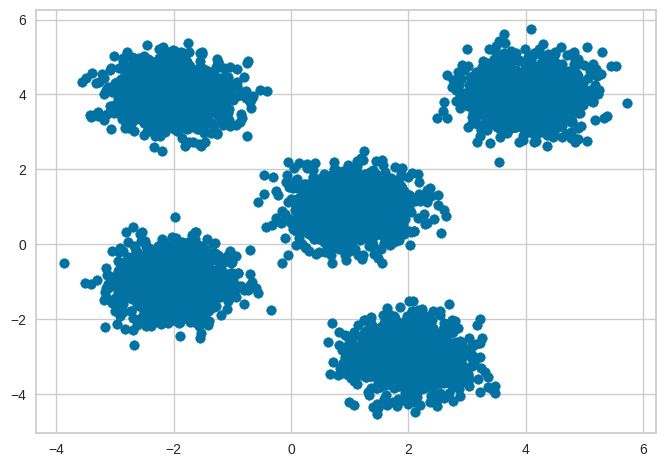

In [2]:
# number of sample
n_sample = 6000
# generate blobs for clustering
X, y = make_blobs(n_samples=n_sample, centers=[[-2,4], [-2, -1], [2, -3], [1, 1],[4,4]], cluster_std=0.5, random_state=0)
#show blob on scatter plot
plt.scatter(X[:,0],X[:,1])

In [3]:
#fit K-Means 
model = KMeans(n_clusters=3,init='k-means++',n_init=12).fit(X)
model_labels = model.labels_
print(f"labels: {model_labels}")
model_cluster_center = model.cluster_centers_
print(f"center: {model_cluster_center}")

labels: [0 2 0 ... 0 2 1]
center: [[ 0.31734795 -1.03554072]
 [ 3.96693653  3.96610723]
 [-2.00317239  3.98259661]]


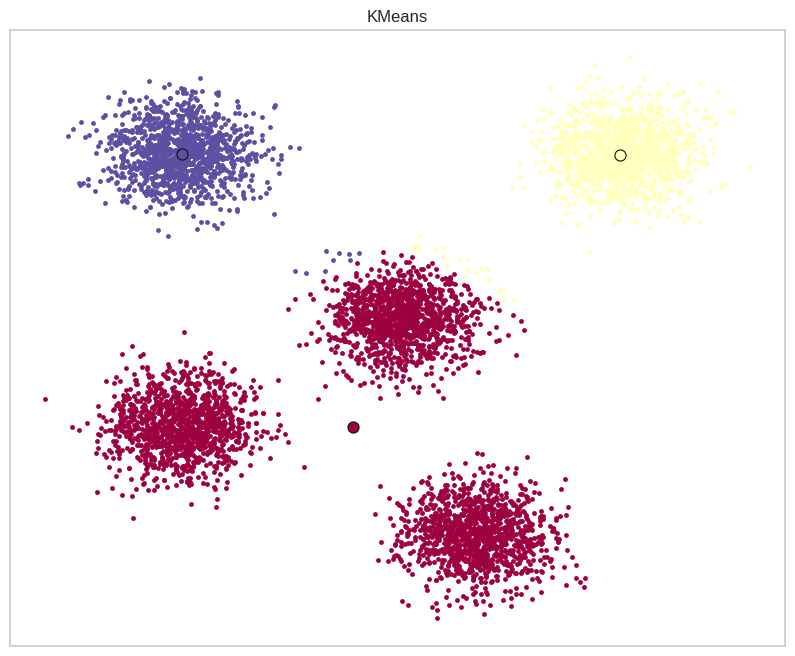

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(model_labels))))

for k, col in zip(range(len(model_cluster_center)), colors):

    my_members = (model_labels == k)   
    cluster_center = model_cluster_center[k]
        
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8,markeredgewidth=.8)


ax.set_title('KMeans')
ax.axis("off")

plt.show()

### Elbow Method

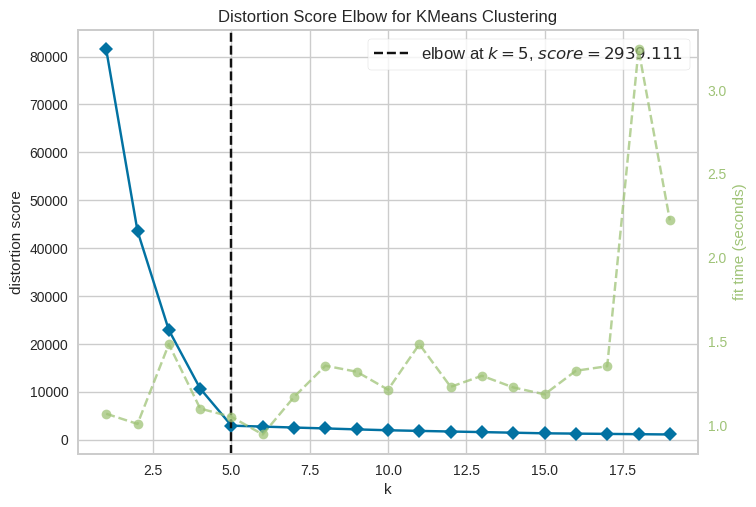

the best n_cluster : 5


In [5]:
## plot Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X) 
visualizer.show()

print(f"the best n_cluster : {visualizer.elbow_value_}")

### K-Means Model

In [6]:
model = KMeans(n_clusters=visualizer.elbow_value_,init='k-means++',n_init=12).fit(X)

model_labels = model.labels_
print(f"labels: {model_labels}")
model_cluster_center = model.cluster_centers_
print(f"center: {model_cluster_center}")

labels: [3 2 4 ... 3 2 1]
center: [[-2.02068233 -1.00202341]
 [ 4.00282202  4.00032461]
 [-2.01840661  3.99728488]
 [ 0.9891345   0.97090888]
 [ 2.00385481 -3.00506057]]


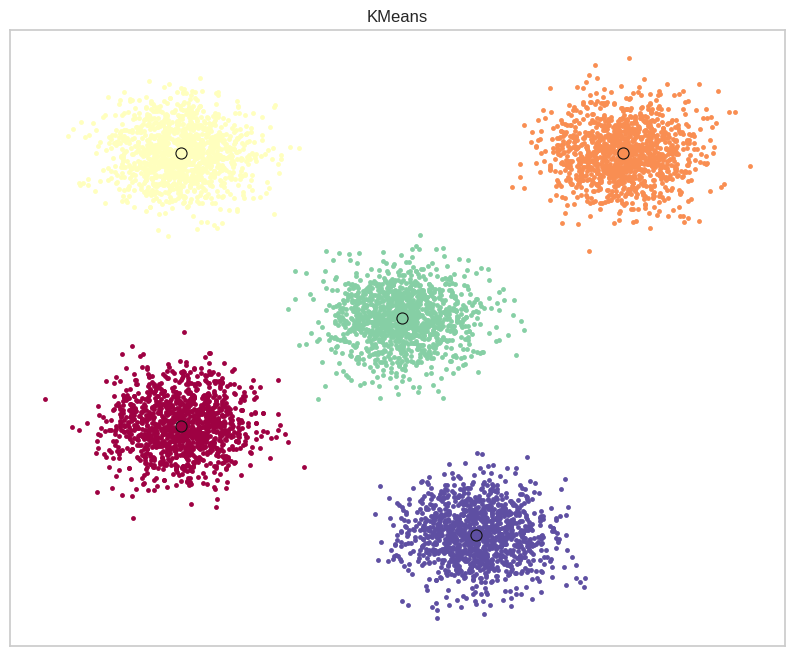

In [7]:
# Initialize plot
fig, ax = plt.subplots(figsize=(10, 8))
# generate color
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(model_labels))))

for k, col in zip(range(len(model_cluster_center)), colors):

    my_members = (model_labels == k)  
    cluster_center = model_cluster_center[k]
        
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8,markeredgewidth=.8)

# Title plot
ax.set_title('KMeans')
# Remove x & y ticks
ax.axis("off")

plt.show()

## Model 2

### Generate blob clustring

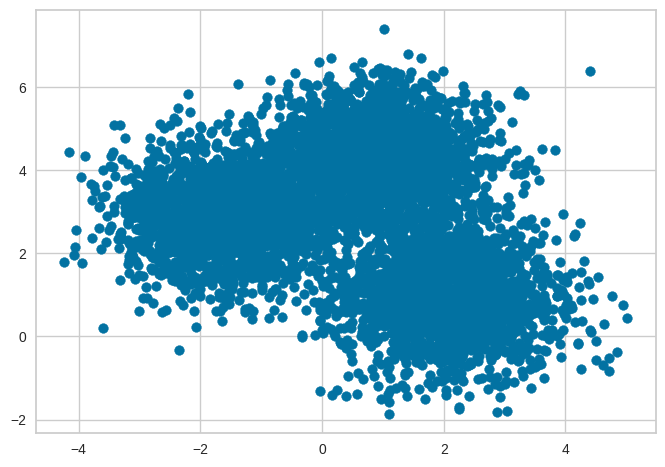

In [4]:
# generate blobs for clustering
X, y = make_blobs(n_samples=n_sample, centers=3, cluster_std=0.9, random_state=0)
#show blob on scatter plot
plt.scatter(X[:,0],X[:,1])

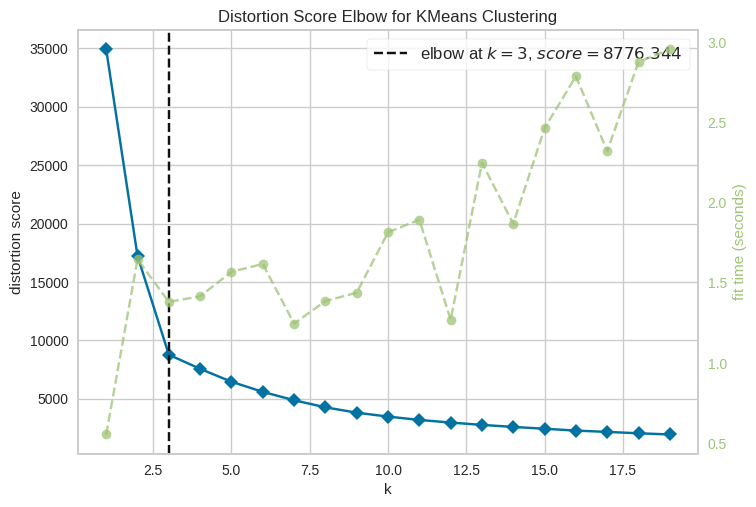

the best n_cluster : 3


In [5]:
## plot Elbow Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)
visualizer.show()

print(f"the best n_cluster : {visualizer.elbow_value_}")

### K-Means Model

In [6]:
model = KMeans(n_clusters=visualizer.elbow_value_,init='k-means++',n_init=12).fit(X)
model_labels = model.labels_
print(f"labels: {model_labels}")
model_cluster_center = model.cluster_centers_
print(f"center: {model_cluster_center}")

labels: [1 1 1 ... 2 2 1]
center: [[-1.62268182  2.86711747]
 [ 2.0614706   0.8671649 ]
 [ 0.93967067  4.30816879]]


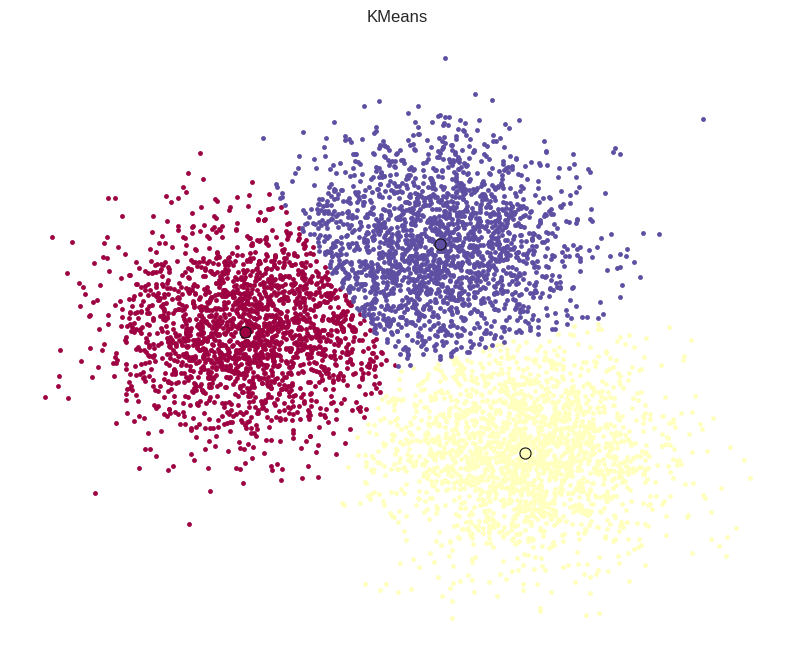

In [7]:
# Initialize plot
fig, ax = plt.subplots(figsize=(10, 8))
# generate color

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(model_labels))))

for k, col in zip(range(len(model_cluster_center)), colors):

    my_members = (model_labels == k)
    cluster_center = model_cluster_center[k]
    
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8,markeredgewidth=.8)

# Title plot
ax.set_title('KMeans')
# Remove x & y ticks
ax.axis("off")
plt.show()

## Model 3

### Generate blob clustring

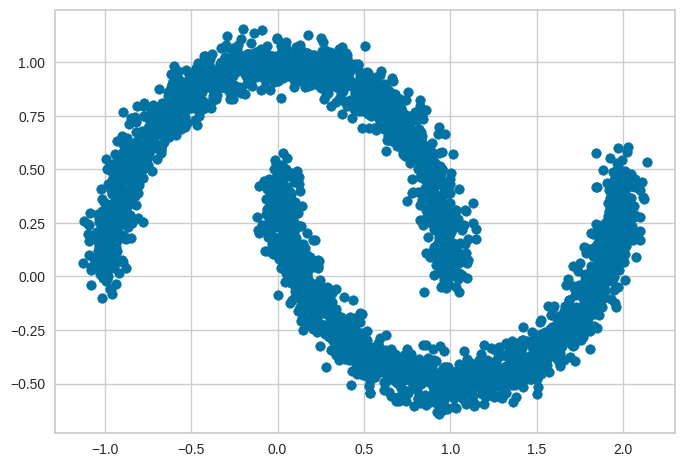

In [8]:
# generate blobs for clustering
X,y = datasets.make_moons(n_samples=3000, noise=0.06,random_state=0)
#show blob on scatter plot
plt.scatter(X[:,0],X[:,1])

### Elbow Method

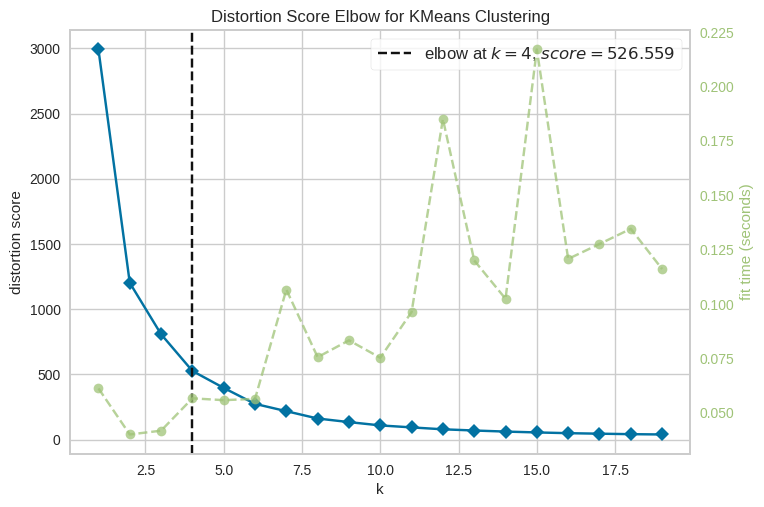

the best n_cluster : 4


In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X) 
visualizer.show()

print(f"the best n_cluster : {visualizer.elbow_value_}")

### K-Means Model

In [10]:
model = KMeans(n_clusters=visualizer.elbow_value_,init='k-means++',n_init=12).fit(X)
model_labels = model.labels_
print(f"labels: {model_labels}")
model_cluster_center = model.cluster_centers_
print(f"center: {model_cluster_center}")

labels: [2 0 2 ... 2 1 1]
center: [[-0.73908144  0.56204203]
 [ 1.73871325 -0.06495724]
 [ 0.2964972   0.70839793]
 [ 0.70007976 -0.19613661]]


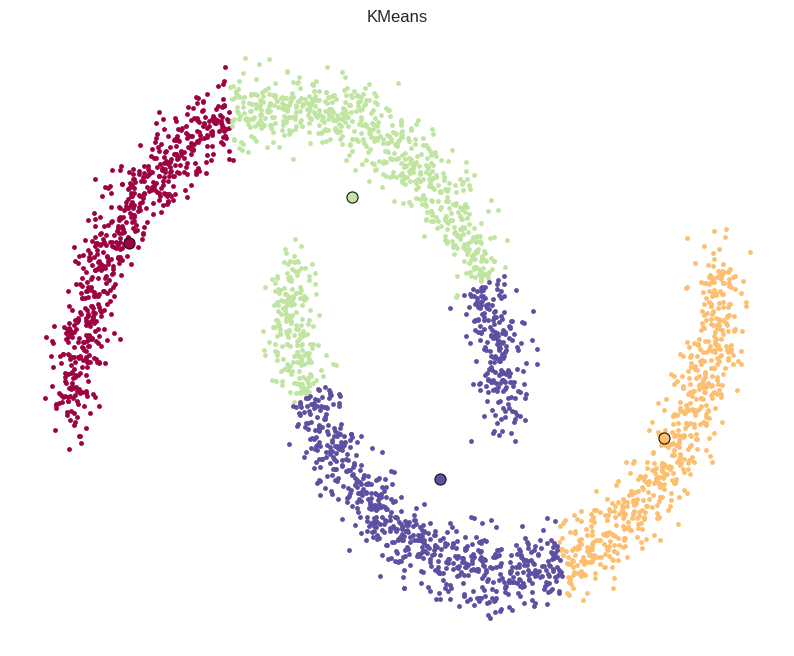

In [11]:
# Initialize plot
fig, ax = plt.subplots(figsize=(10, 8))
# generate color
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(model_labels))))

for k, col in zip(range(len(model_cluster_center)), colors):

    my_members = (model_labels == k)
    cluster_center = model_cluster_center[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=8,markeredgewidth=.8)

# Title plot
ax.set_title('KMeans')
# Remove x & y ticks
ax.axis("off")
plt.show()

## K-Means model on Mnist Dataset

In [2]:
#load Mnist DataSet
(X_train,y_train),(X_test,y_test) = mnist.load_data(path="mnist.npz")

print("-------- Train --------")
print(f"Train Data: {X_train.shape}")
print(f"Train Labels: {X_train.shape}")
print("-------- Test --------")
print(f'Testing Data: {X_test.shape}')
print(f'Testing Labels: {y_test.shape}')

-------- Train --------
Train Data: (60000, 28, 28)
Train Labels: (60000, 28, 28)
-------- Test --------
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


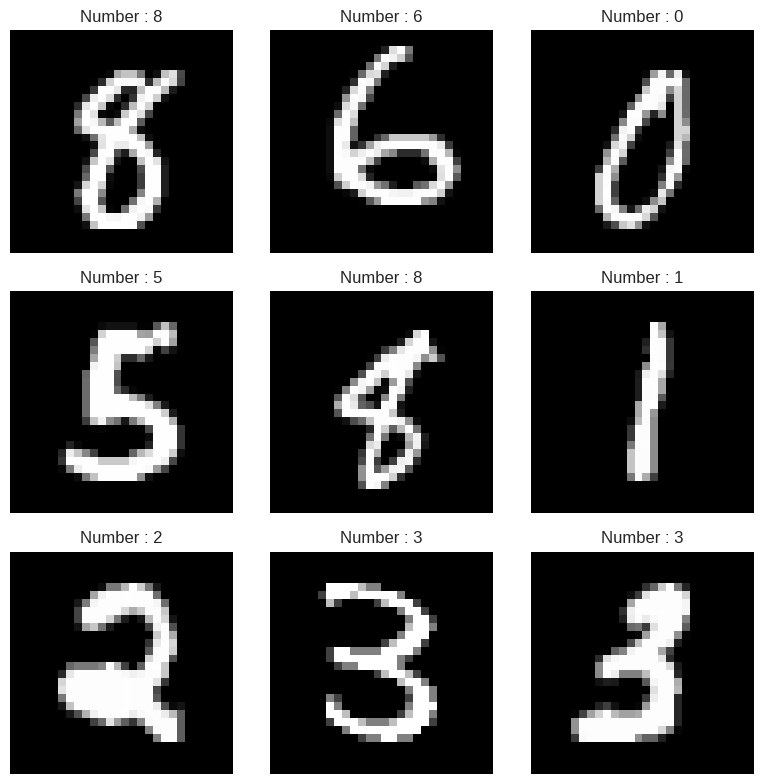

In [3]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3,3,i+1)
    rnd = random.randint(0, len(X_train))
    plt.imshow(X_train[rnd], cmap='gray')
    plt.title(f"Number : {y_train[rnd]}")
    plt.axis("off")

plt.tight_layout()

In [4]:
#change shape Train data as (6000,28,28) to (6000, 784)
X = X_train.reshape(len(X_train),-1)
y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)


(60000, 784)


In [12]:
model = MiniBatchKMeans(n_clusters=10)
X1 = X[:600,:]
X_plt=model.fit(X1).transform(X1)

Y_plt = y_train[:600]

scatter = {
    'mode':"markers",
    'name': "y",
    'type': "scatter3d",    
    'x': X_plt[:,0], 
    'y': X_plt[:,1], 
    'z': X_plt[:,2],
    'marker': {'size':3, 'color':Y_plt, 'colorscale':'Rainbow'}
}

fig = {'data':[scatter]}
py.iplot(fig)

In [30]:
n_cluster = len(np.unique(y_test))
model = MiniBatchKMeans(n_clusters = n_cluster,init='k-means++').fit(X)

In [31]:
print(model.labels_[:20])
print(y[:20])

[6 8 1 0 9 3 2 6 2 5 6 0 6 3 2 5 3 5 2 5]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [32]:
def retrieve_Label(model,y_train):
    # Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(model.labels_))):
        index = np.where(model.labels_ == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [42]:
def  data_label(labels,retrieve):
    array = np.zeros(len(labels))
    for i in range(len(labels)):
        array[i] = retrieve[labels[i]]
    return array

In [34]:
ret_lbl =retrieve_Label(model= model,y_train = y_train)
ret_lbl

{0: 1, 1: 4, 2: 1, 3: 2, 4: 0, 5: 8, 6: 3, 7: 9, 8: 0, 9: 7}

In [35]:
predict = data_label(model,ret_lbl)

In [36]:
print(predict[:20].astype(int))
print(y_train[:20])

[3 0 4 1 7 2 1 3 1 8 3 1 3 2 1 8 2 8 1 8]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [37]:
cluster_number = [50,100,150,200,250,300,350,400]

for n_cluster in cluster_number:
    
    model = MiniBatchKMeans(n_clusters=n_cluster,init='k-means++').fit(X)
    ret_lbl =retrieve_Label(model= model,y_train = y_train)
    
    predict = data_label(model.labels_,ret_lbl)
    
    print(f"Number Cluster: {n_cluster}")
    print(f"Accuracy_score: {accuracy_score(predict,y_train):0.3f}")

Number Cluster: 50
Accuracy_score: 0.800
Number Cluster: 100
Accuracy_score: 0.852
Number Cluster: 150
Accuracy_score: 0.861
Number Cluster: 200
Accuracy_score: 0.889
Number Cluster: 250
Accuracy_score: 0.899
Number Cluster: 300
Accuracy_score: 0.900
Number Cluster: 350
Accuracy_score: 0.907
Number Cluster: 400
Accuracy_score: 0.912


In [40]:
x_test = X_test.reshape(len(X_test), -1)
x_test = x_test.astype(float)/255

In [43]:
model = MiniBatchKMeans(n_clusters=300,init='k-means++').fit(X)

ret_lbl =retrieve_Label(model= model,y_train = y_train)

y_pred = model.predict(x_test)

predict = data_label(y_pred,ret_lbl)

print(f"Accuracy_score: {accuracy_score(y_test, predict):0.3f}")

Accuracy_score: 0.908


In [44]:
centroids = model.cluster_centers_
centroids = centroids.reshape(300,28,28)
centroids = centroids * 255

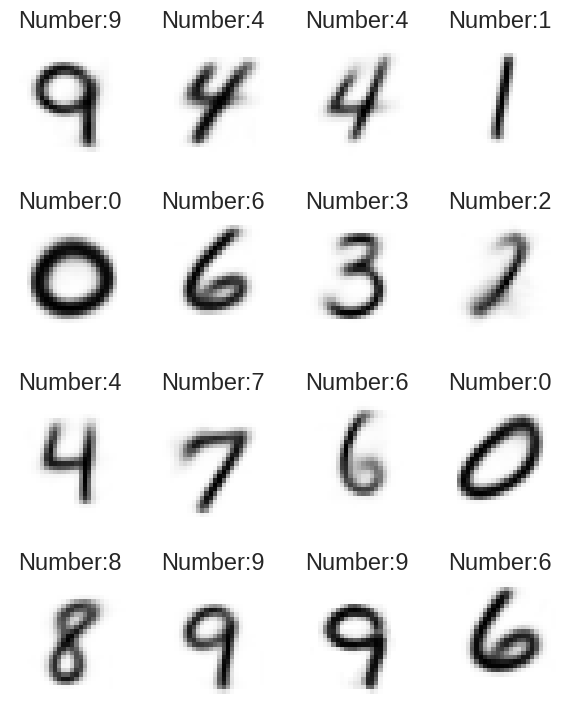

In [45]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.title('Number:{}'.format(ret_lbl[i]),fontsize = 17)
    plt.imshow(centroids[i])
    plt.axis("off")